# 퍼셉트론(Perceptron)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 논리 게이트

In [2]:
def activation(x):
    return tf.cast((x > 0), dtype=tf.float32)

# AND 게이트 함수 정의
def AND(x, w, b):
    z = tf.math.reduce_sum(w * x) + b           
    a = activation(z)
    return a

# NAND 게이트 함수 정의
def NAND(x, w, b):
    z = tf.math.reduce_sum(w * x) + b
    a = activation(z)
    return a

# AND 게이트 함수 정의
def OR(x, w, b):
    z = tf.math.reduce_sum(w * x) + b
    a = activation(z)
    return a

# 각 게이트에 알맞는 w, b 가중치 생성
w_and = tf.Variable([0.5, 0.5])  
b_and = tf.Variable([-0.7])
w_nand = tf.Variable([-0.5, -0.5])  
b_nand = tf.Variable([0.7])
w_or = tf.Variable([0.5, 0.5]) 
b_or = tf.Variable([-0.2])

# 입력 텐서를 만들어 결과 확인
X = tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=tf.float32)
for x in X:
    print(f"input : {x}")
    print(" - AND:", AND(x, w=w_and, b=b_and).numpy())
    print(" - NAND:", NAND(x, w=w_nand, b=b_nand).numpy())
    print(" - OR:", OR(x, w=w_or, b=b_or).numpy())
    print("--"*15)

input : [0. 0.]
 - AND: [0.]
 - NAND: [1.]
 - OR: [0.]
------------------------------
input : [0. 1.]
 - AND: [0.]
 - NAND: [1.]
 - OR: [1.]
------------------------------
input : [1. 0.]
 - AND: [0.]
 - NAND: [1.]
 - OR: [1.]
------------------------------
input : [1. 1.]
 - AND: [1.]
 - NAND: [0.]
 - OR: [1.]
------------------------------


### 다른 관점에서 퍼셉트론 이해하기

직관적인 그림으로 지금까지 소개한 AND, NAND, OR 게이트들을 이해해보자. 사실 이 모든 게이트들은 평면상에서 하나의 선으로 2종류의 점들을 분류하는 것과 같은 문제다. 

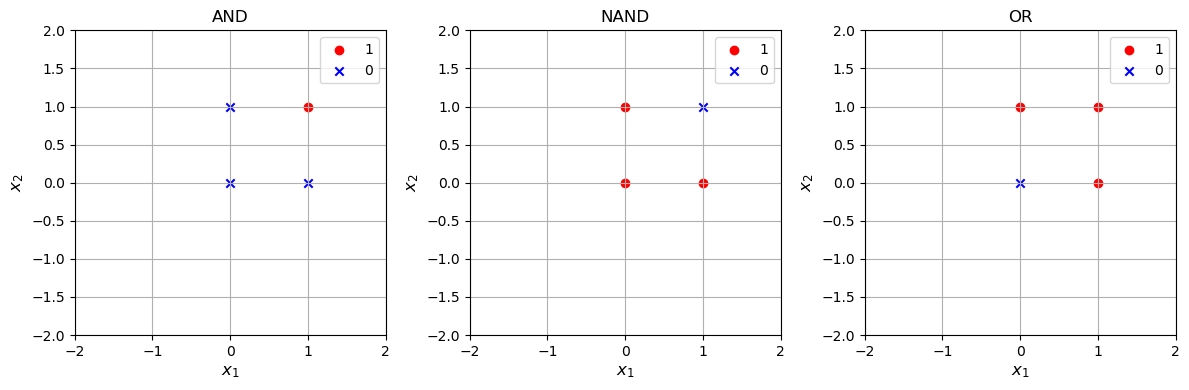

In [3]:
def plot_dots(ax, gate_func):
    x = [(0, 0), (1, 0), (0, 1), (1, 1)]
    if (gate_func.__name__ == "AND"):
        marker_o = list(zip(*x[3:]))
        marker_x = list(zip(*x[:3]))
    elif (gate_func.__name__ == "NAND"):
        marker_o = list(zip(*x[:3]))
        marker_x = list(zip(*x[3:]))
    elif (gate_func.__name__ == "OR"):
        marker_o = list(zip(*x[1:]))
        marker_x = list(zip(*x[:1]))
    elif (gate_func.__name__ == "XOR"):
        marker_o = list(zip(*x[1:3]))
        marker_x = list(zip(*x[::3]))
    else:
        return "gate_func error"

    ax.scatter(marker_o[0], marker_o[1], c='r', marker='o', label='1')
    ax.scatter(marker_x[0], marker_x[1], c='b', marker='x', label='0')
    ax.legend()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_title(gate_func.__name__)
    ax.grid()
    ax.set_xlabel("$x_1$", fontsize=12)
    ax.set_ylabel("$x_2$", fontsize=12)
    
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)

for ax, func in zip(axes, [AND, NAND, OR]):
    plot_dots(ax=ax, gate_func=func)
plt.tight_layout()
plt.show()

$z=w_1x_1+ w_2x_2 + b$ 에서 $z=0$ 으로 두고 $x_1, x_2$ 평면에 그려본다. 하나의 직선이 두 종류의 점을 분류하게 된다. 선형 분류기라고 불리는 이유도 이같은 이유다.

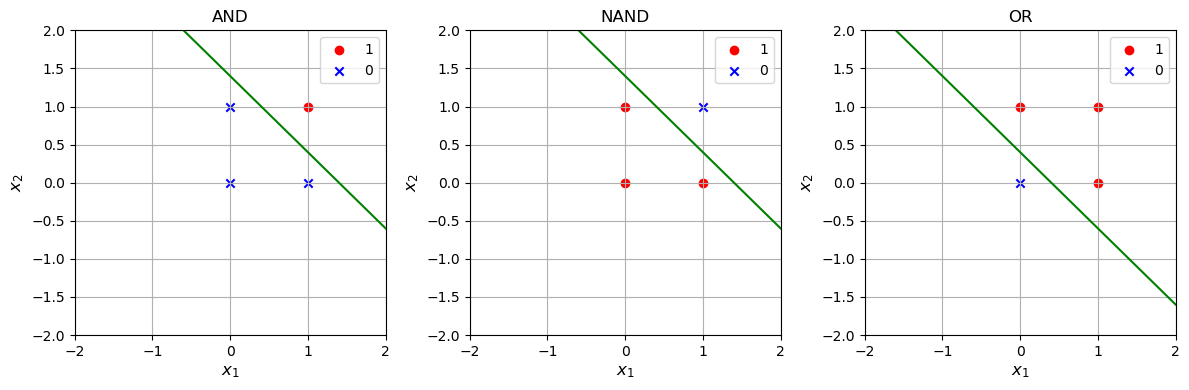

In [4]:
def plot_line(**kwargs):
    """x2 = (-w1*x1 - b) / w2"""
    x1 = [-2, 2]
    w = kwargs['w']
    b = kwargs['b']
    get_x2 = lambda x: (-w[0]*x - b) / w[1]
    # line plot
    ax=kwargs['ax']
    ax.plot(x1, [get_x2(x1[0]), get_x2(x1[1])], c='g')

fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
for ax, func, (w, b) in zip(axes, [AND, NAND, OR], [(w_and, b_and), (w_nand, b_nand), (w_or, b_or)]):
    plot_dots(ax=ax, gate_func=func)
    plot_line(ax=ax, w=w, b=b)
plt.tight_layout()
plt.show()

## XOR 문제

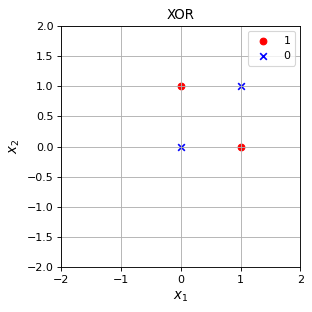

In [5]:
# 그림 2-30

def XOR():
    """empty function"""
    pass

fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=80)
plot_dots(ax=ax, gate_func=XOR)
plt.tight_layout()
plt.show()

In [6]:
def solution(x, **kwargs):
    # 새로운 층
    # 정답을 작성해주세요.
    s1 = 
    s2 =
    
    # 출력 층: s1 과 s2 를 새로운 입력으로 구성하여 전달
    # 정답을 작성해주세요.
    y = AND(tf.concat([s1, s2], axis=0), w=kwargs['w_and'], b=kwargs['b_and'])
    return y

# 입력 텐서와 타겟 텐서를 생성
input_data = tf.constant([[0, 0], [1, 0], [0, 1], [1, 1]], dtype=tf.float32)
target_data = tf.constant([0, 1, 1, 0], dtype=tf.float32)

# 이전에 사용한 가중치를 dictionary 타입으로 만든다.
kwargs = dict([('w_nand', w_nand), ('b_nand', b_nand), 
               ('w_or', w_or), ('b_or', b_or), 
               ('w_and', w_and), ('b_and', b_and)])

# 테스트
for x, y in zip(input_data, target_data):
    pred = solution(x, **kwargs)
    print(f"predict: {pred.numpy()} | target: {y.numpy()}")

predict: 0.0 | target: 0.0
predict: 1.0 | target: 1.0
predict: 1.0 | target: 1.0
predict: 0.0 | target: 0.0


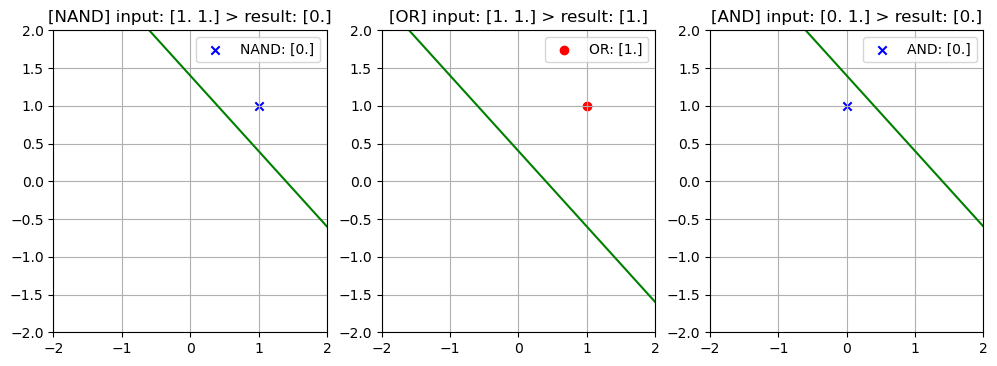

In [7]:
def draw_solution(x, w, b, ax, func):
    s = func(x, w=w, b=b).numpy()
    marker_shape = 'o' if s == 1 else 'x'
    marker_color = 'r' if s == 1 else 'b'
    ax.scatter(x.numpy()[0], x.numpy()[1], c=marker_color, marker=marker_shape, label='{}: {}'.format(func.__name__, s))
    plot_line(ax=ax, w=w, b=b)
    ax.legend()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.grid()
    ax.set_title('[{}] input: {} > result: {}'.format(func.__name__, x.numpy(), s))
    
def draw_solution_by_step(x, **kwargs):
    NAND = kwargs['f_nand']
    OR = kwargs['f_or']
    AND = kwargs['f_and']
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
    
    s1 = NAND(x, w=kwargs['w_nand'], b=kwargs['b_nand'])
    s2 = OR(x, w=kwargs['w_or'], b=kwargs['b_or'])
    s = tf.concat([s1, s2], axis=0)

    draw_solution(x, w=kwargs['w_nand'], b=kwargs['b_nand'], ax=axes[0], func=NAND)
    draw_solution(x, w=kwargs['w_or'], b=kwargs['b_or'], ax=axes[1], func=OR)
    draw_solution(s, w=kwargs['w_and'], b=kwargs['b_and'], ax=axes[2], func=AND)

x = tf.constant([1, 1], dtype=tf.float32)
kwargs.setdefault('f_nand', NAND)
kwargs.setdefault('f_or', OR)
kwargs.setdefault('f_and', AND)
draw_solution_by_step(x, **kwargs)

NAND와 OR의 결과 값으로 출력된 신호들로 구성된 점이 평면상에서 다른 곳으로 이동하면서 AND 함수를 거쳐 최종 출력 신호를 만들어 냈다. 이렇게 입력과 출력 사이에 층을 더하니 다른 표현을 만들어냈고, 추가로 새로운 정보가 구성되면서 원하는 출력 신호를 얻을 수 있게 된다. 

In [8]:
def draw_gate_area():
    fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=100)
    get_x2 = lambda x, w, b: (-w[0]*x - b) / w[1]
    w_nand, b_nand = [-0.5, -0.5], 0.7
    w_or, b_or = [0.5, 0.5], -0.2
    xx = tf.linspace(-2, 2, num=100)
    y_nand = get_x2(xx, w=w_nand, b=b_nand)
    y_or = get_x2(xx, w=w_or, b=b_or)
    ax.fill_between(xx.numpy(), y_nand.numpy(), y_or.numpy(), facecolor='g', alpha=0.3)
    plot_dots(ax=ax, gate_func=XOR)
    plot_line(ax=ax,  w=w_nand, b=b_nand)
    plot_line(ax=ax,  w=w_or, b=b_or)
    plt.tight_layout()
    plt.show()

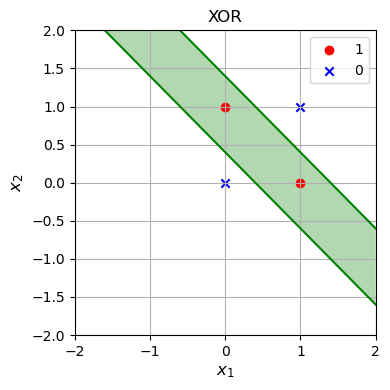

In [9]:
draw_gate_area()